In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [237]:
# Time steps
N = 50
T_trans = 20
T_avg = 150

# Discretisation
h = tau/(N-1)

# Mackey Glass constants
a = 0.2
b = 0.1
n = 10
tau = 17

In [238]:
def mackeyglass(x, x_lag):
    dxdt = (a * x_lag) / (1 + x_lag**n) - b * x
    return dxdt

def partialF_partialx(x):
    return -b

def partialF_partialxlag(x_lag):
    return -a * n * x_lag**n * (1 + x_lag**n)**(-2) + a * (1 + x_lag**n)**(-1)

def iter_rk4(x_prev, x_lag, f):   # for single variable 
    
    z1 = x_prev
    z2 = x_prev + (h/2)*f(z1, x_lag)
    z3 = x_prev + (h/2)*f(z2, x_lag)
    z4 = x_prev + h*f(z3, x_lag)
    
    z = (h/6)*(f(z1, x_lag) + 2*f(z2, x_lag) + 2*f(z3, x_lag) + f(z4, x_lag))
    x_curr = x_prev + z
    
    return x_curr

def euler(x_prev, x_lag, f):
    return x_prev + h*f(x_prev, x_lag)

def gram_schmidt(dx):   # matrix with vectors stored as columns
    alpha = np.zeros(shape=(N,))
    for j in range(N):
        for s in range(j):
            dx[: , j] = dx[: , j] - np.dot(dx[: , s], dx[: , j]) * dx[: , s]
        alpha[j] = np.linalg.norm(dx[: , j])
        dx[:, j] = dx[: , j] / alpha[j]
    return dx, alpha

In [239]:
delta = 10**(-7)
x0 = 1.2

Lambda = np.zeros(shape=(N,))
dx = delta * np.identity(N)
x = x0 * np.ones(shape=(N,))

x_ls = []
for k in range(T_trans + T_avg):
    
    for j in range(N):
        # Solving linearised DDE - RK4 for each time step in the kth interval
        dx_dot = lambda dx, dx_lag: partialF_partialx(x[N-1])*dx + partialF_partialxlag(x[0])*dx_lag
        dx[0, j] = iter_rk4(dx[N-1, j], dx[0, j], dx_dot)
        for i in range(1, N):
            dx_dot = lambda dx, dx_lag: partialF_partialx(x[i-1])*dx + partialF_partialxlag(x[i])*dx_lag
            dx[i, j] = iter_rk4(dx[i-1, j], dx[i, j], dx_dot)
    
    # Solving DDE - RK4 for each time step in the kth interval
    x[0] = iter_rk4(x[N-1], x[0], mackeyglass)
    for i in range(1,N):
        x[i] = iter_rk4(x[i-1], x[i], mackeyglass)
        x_ls.append(x[i])
        
    # Orthonormalise to get dx = orthonormalised vectors, alpha = length of vectors
    dx, alpha = gram_schmidt(dx)
    
    if k > T_trans:
        for j in range(N):
            Lambda[j] = Lambda[j] + np.log(alpha[j])
            
for j in range(N):
    Lambda[j] = Lambda[j]/(T_avg*tau)

([<matplotlib.axis.XTick at 0x12fdba3a0>,
 [Text(0.0, 0, '0'),
  Text(1700.0, 0, '500'),
  Text(3400.0, 0, '1000'),
  Text(5100.0, 0, '1500'),
  Text(6800.0, 0, '2000'),
  Text(8500.0, 0, '2500')])

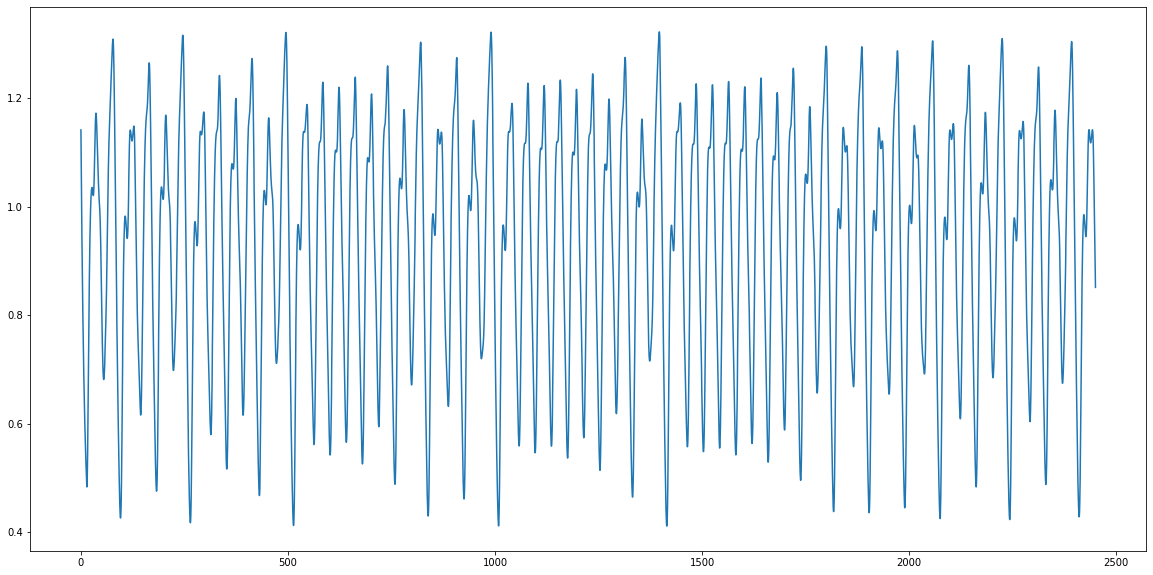

In [252]:
ticks=np.linspace(0, (T_trans+T_avg)*N, 6)
labels = np.arange(0, (T_trans+T_avg)*tau, step=500)
plt.figure(figsize=(20,10))
plt.plot(x_ls)
plt.xticks(ticks, labels)

In [241]:
Lambda

array([ 0.00597624,  0.00045582, -0.03876146, -0.04988842, -0.07240083,
       -0.08741687, -0.09896995, -0.10557035, -0.11881322, -0.12170892,
       -0.12961941, -0.13221294, -0.14098798, -0.14324782, -0.14746305,
       -0.15350479, -0.15405428, -0.15899945, -0.16192199, -0.16357573,
       -0.16832888, -0.17070008, -0.17198688, -0.17484402, -0.17822925,
       -0.1767566 , -0.17893965, -0.18408894, -0.18423022, -0.18533157,
       -0.1862265 , -0.18593318, -0.18675403, -0.18867746, -0.19013202,
       -0.19125282, -0.19151612, -0.19227467, -0.19260464, -0.19485897,
       -0.19505238, -0.19406952, -0.19417708, -0.19553372, -0.19658265,
       -0.19692572, -0.19645103, -0.19734905, -0.20057451, -0.2000873 ])